# Associate the STA/LTA detections

In [1]:
# Import modules

from os import makedirs
from os.path import join
from pandas import read_csv

from utils_basic import ROOTDIR
from utils_sta_lta import merge_station_detections, associate_detections, bin_events_by_hour, plot_station_hourly_detections
from matplotlib.pyplot import show

In [2]:
# Inputs
sta_lta_dir = "detections_sta0.01s_lta0.20s_on5_off2"
numdet_min = 8 # Minimum number of detections to claim an event
delta_max = 0.2 # Maximum time difference to associate detections
ymax = 9500

use_snr = False # Use signal-to-noise ratio to filter detections
minsnr = 1.0 # Minimum signal-to-noise ratio

indir = join(ROOTDIR, sta_lta_dir)
stapath = join(ROOTDIR, "stations_sta_lta.csv")


In [3]:
# Read the number of detections per hour for all stations
inpath = join(indir, "hourly_detection_numbers.csv")

stadetnum_df = read_csv(inpath, parse_dates=["hour"])

In [4]:
# Read the station detections
stadf = read_csv(stapath, index_col=0)

stadet_dict = {}
for station in stadf["name"]:
    inpath = join(indir, f"{station}.csv")
    try:
        stadet_dict[station] = read_csv(inpath, index_col=0, parse_dates=["trigger_time", "detrigger_time"])
    except FileNotFoundError:
        print(f"File not found: {inpath}")

    print(f"Read {inpath}")

Read /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on5_off2/A01.csv
Read /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on5_off2/A02.csv
Read /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on5_off2/A03.csv
Read /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on5_off2/A04.csv
Read /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on5_off2/A05.csv
Read /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on5_off2/A06.csv
Read /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on5_off2/A07.csv
Read /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on5_off2/A08.csv
Read /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on5_off2/A09.csv
Read /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on5_off2/A10.csv
Read /Volumes/OmanData/geophones_no_prefilt/data/d

In [5]:
# Merge the station detections
detdf_a, detdf_b = merge_station_detections(stadet_dict)

Total number of detections to associate: 7078508 (A) and 5758541 (B).


In [6]:
# Associate the detections
print("Associating the detections for Subarray A...")
events_a = associate_detections(detdf_a, numdet_min=numdet_min, delta_max=delta_max, use_snr=use_snr, min_snr=minsnr)

print("Associating the detections for Subarray B...")
events_b = associate_detections(detdf_b, numdet_min=numdet_min, delta_max=delta_max, use_snr=use_snr, min_snr=minsnr)

Associating the detections for Subarray A...
There are in total 186072 associated events.
Associating the detections for Subarray B...
There are in total 68889 associated events.


In [7]:
# Save the associated events to files
outdir = join(indir, f"associated_events_num{numdet_min:d}_delta{delta_max:.3f}s")
makedirs(outdir, exist_ok=True)

events_a.write_to_file(join(outdir, "events_a.dat"))
events_b.write_to_file(join(outdir, "events_b.dat"))

Events are written to /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on5_off2/associated_events_num8_delta0.200s/events_a.dat.
Events are written to /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on5_off2/associated_events_num8_delta0.200s/events_b.dat.


In [8]:
# import importlib
# import utils_sta_lta
# importlib.reload(utils_sta_lta)

# # Bin the events by hour

# countdf_a = utils_sta_lta.bin_events_by_hour(events_a)
# countdf_b = utils_sta_lta.bin_events_by_hour(events_b)

countdf_a = bin_events_by_hour(events_a)
countdf_b = bin_events_by_hour(events_b)


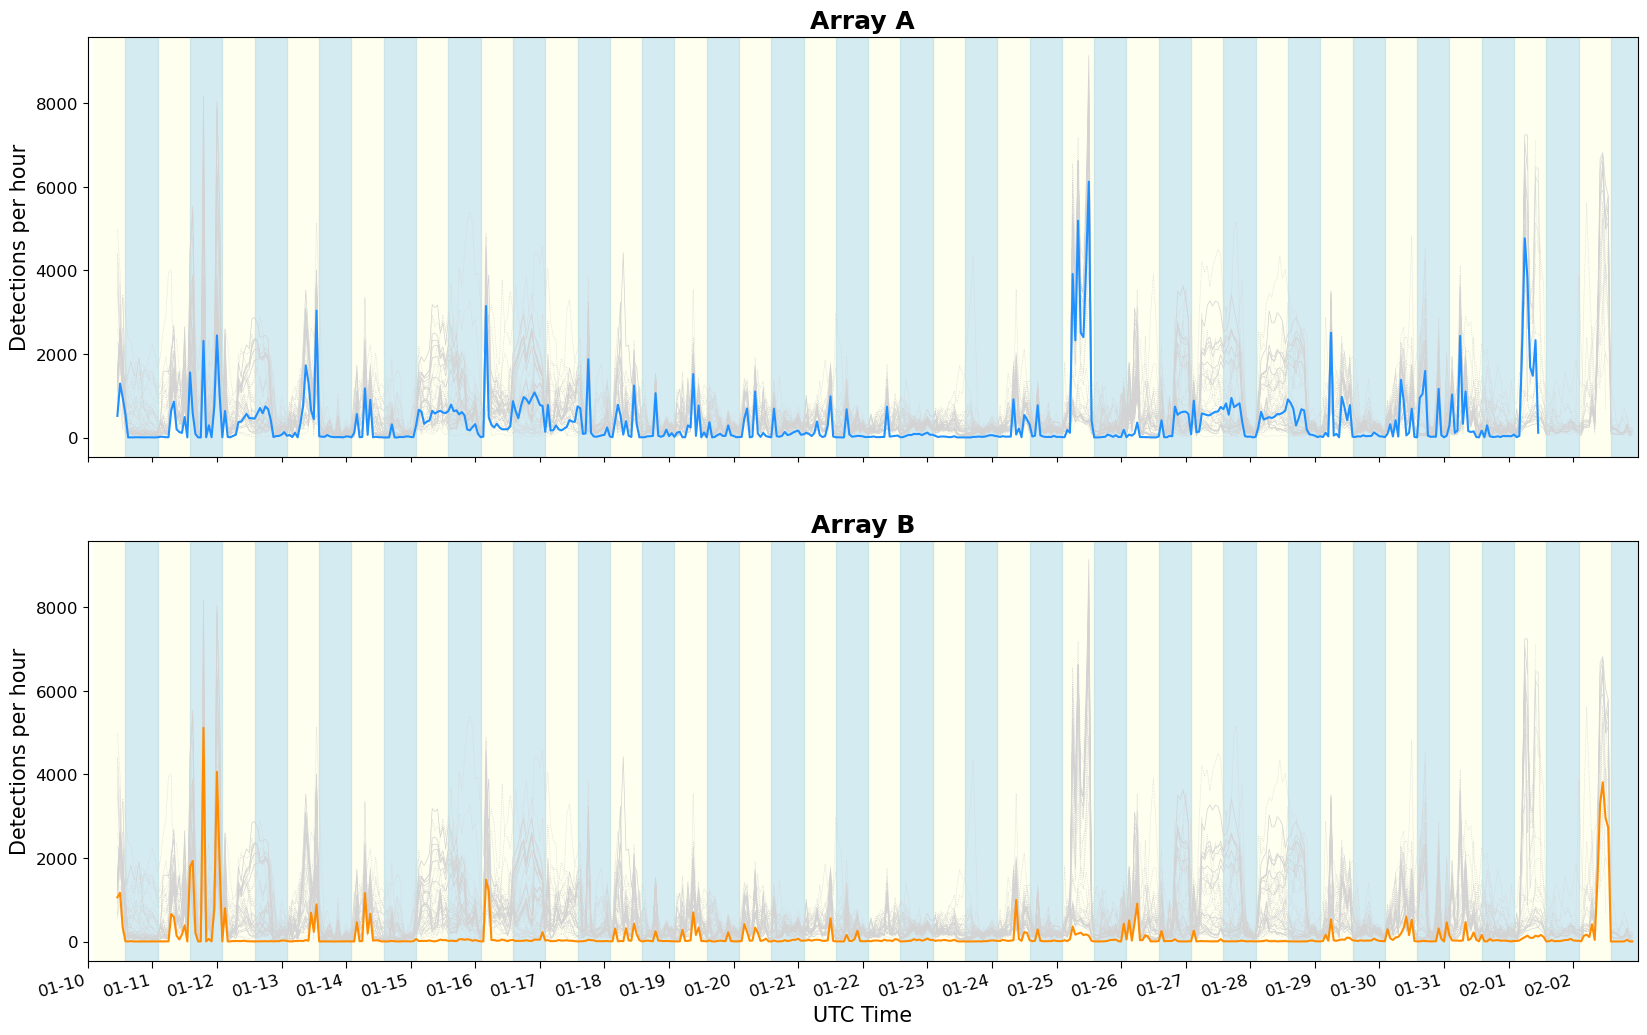

In [9]:
# Plot the hourly numbers of raw detection and associated detections
fig, axes = plot_station_hourly_detections(stadetnum_df, individual_color=False, days_and_nights=True)
axes[0].plot(countdf_a.index, countdf_a["count"], color="dodgerblue", label="Subarray A")
axes[1].plot(countdf_b.index, countdf_b["count"], color="darkorange", label="Subarray B")

show()

# Save the figure
fig.tight_layout()
fig.patch.set_alpha(0)

figpath = join(outdir, "hourly_association_numbers.png")
fig.savefig(figpath, dpi=300)